In [4]:
import pandas as pd
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from joblib import dump, load

In [2]:
cr = pd.read_excel('../Downloads/datasets.xls',sheet_name="IMDb", header=None)
cr.columns=["X",'y']

In [3]:
cr.to_csv("IMDB.csv")

In [3]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))
X = vectorizer.fit_transform(cr["X"])

In [4]:
y = cr['y'].map(lambda x: 1 if x=="POSITIVE" else 0)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [6]:
svc = LinearSVC(max_iter=10000)
svc.fit(X_train,y_train)

/Users/dhruvchopra/opt/anaconda3/envs/ddp/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(max_iter=10000)

In [7]:
y_pred = svc.predict(X_test)

In [8]:
f1_score(y_true=y_test, y_pred=y_pred)

0.9105887080570624

In [9]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.911

In [10]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[2289,  242],
       [ 203, 2266]])

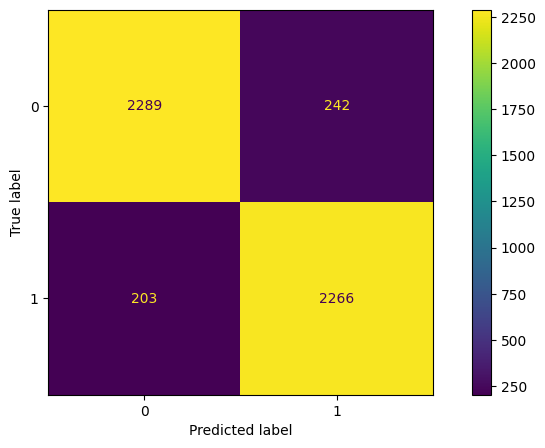

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax)

In [1]:
test = "I would not buy this"
if(svc.predict(vectorizer.transform([test]))==1):
    print("Positive")
else:
    print("Negative")

NameError: name 'svc' is not defined

In [13]:
dump(svc, 'sentiment.joblib') 

['sentiment.joblib']

In [14]:
dump(vectorizer, 'tfidf.joblib')

['tfidf.joblib']

In [6]:
clf_sub = load('polarity.joblib')
vec_sub = load('tfidf_polarity.joblib')

clf_sent = load('sentiment_2.joblib')
vec_sent = load('tfidf_2.joblib')

In [41]:
### Test
test = "movie has a good"

In [42]:
if(clf_sub.predict(vec_sub.transform([test]))==1):
    print("Subjective")
    if(clf_sent.predict(vec_sent.transform([test]))==1):
        print("Positive")
    else:
        print("Negative")
else:
    print("Objective")

Subjective
Positive


In [35]:
test = "I'm glad I purchased this movie"
if(clf.predict(vec.transform([test]))==1):
    print("Positive")
else:
    print("Negative")

Positive
